In [31]:
import math
import random as random

## A)

In [32]:
def function(x1, x2, y):
    return x1**2 + y*x2**2 - x1*x2 - x1 - x2 

def function_derivative_wrt_x1(x1, x2, y):
    return 2*x1 - x2 - 1

def function_derivative_wrt_x2(x1, x2, y):
    return 2*y*x2 - x1 - 1

def function_derivative_wrt_y(x1, x2, y):
    return x2**2

In [56]:
def gradient_descent_optimization(x1_initial, x2_initial, y_initial, step_size, threshold, file_name, max_iters=1000):
    x1 = x1_initial
    x2 = x2_initial
    y = y_initial
    step_size = step_size
    threshold = threshold
    iters = 0

    # Write initial conditions to file
    with open(f'Gradient_Descent_Logs\{file_name}', 'w') as f:
        f.write(f'Initial Conditions: x1: {x1_initial} x2: {x2_initial} y: {y_initial} step_size: {step_size} threshold: {threshold}\n')

    while math.fabs(function_derivative_wrt_x1(x1, x2, y)) > threshold and math.fabs(function_derivative_wrt_x2(x1, x2, y)) > threshold and math.fabs(function_derivative_wrt_y(x1, x2, y)) > threshold and iters < max_iters:
        x1 = x1 - step_size * function_derivative_wrt_x1(x1, x2, y)
        x2 = x2 - step_size * function_derivative_wrt_x2(x1, x2, y)
        iters += 1
        
        with open(f'Gradient_Descent_Logs\{file_name}', 'a') as f:
            f.write(f'Iteration: {iters} x1: {x1} x2: {x2} y: {y} function: {function(x1, x2, y)} function_derivative_wrt_x1: {function_derivative_wrt_x1(x1, x2, y)} function_derivative_wrt_x2: {function_derivative_wrt_x2(x1, x2, y)} function_derivative_wrt_y: {function_derivative_wrt_y(x1, x2, y)}\n')
    
    return {
        'x1': x1,
        'x2': x2,
        'y': y,
        'iters': iters,
        'step_size': step_size,
        'threshold': threshold,
        'max_iters': max_iters,
        'max_iters_reached': iters == max_iters,
        'function': function(x1, x2, y),
        'function_derivative_wrt_x1': function_derivative_wrt_x1(x1, x2, y),
        'function_derivative_wrt_x2': function_derivative_wrt_x2(x1, x2, y),
        'function_derivative_wrt_y': function_derivative_wrt_y(x1, x2, y)
    }

In [57]:
# Choose randokm initial conditions
random.seed(0)
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = 1
optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, 0.1, 1e-5, 'PartA.txt')
print(f'Iterations Required: {optimization_result["iters"]}')

Iterations Required: 117


## B)

## C)

In [58]:
random.seed(0)
step_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
iters_to_converge = []
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = 1
for step_size in step_sizes:
    optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, step_size, 1e-5, f'PartC_StepSize_{step_size}.txt')
    iters_to_converge.append(optimization_result['iters'])

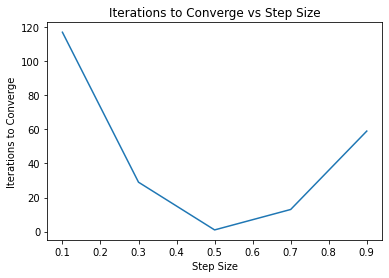

In [59]:
# Plot the number of iterations required to converge vs step size
import matplotlib.pyplot as plt
plt.plot(step_sizes, iters_to_converge)
plt.xlabel('Step Size')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs Step Size')
plt.show()

## D)

In [60]:
# 5 Random Values of y between 0 and 1
random.seed(0)
y_values = [random.uniform(0, 1) for i in range(5)]
y_values.sort()
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
step_size = 0.1
iters_to_converge = []
for y in y_values:
    optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y, step_size, 1e-5, f'PartD_y_{y}.txt')
    iters_to_converge.append(optimization_result['iters'])


In [61]:
y_values

[0.25891675029296335,
 0.420571580830845,
 0.5112747213686085,
 0.7579544029403025,
 0.8444218515250481]

In [62]:
iters_to_converge

[1000, 331, 230, 143, 127]

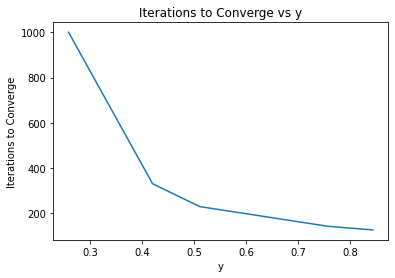

In [63]:
# Plot the number of iterations required to converge vs y
import matplotlib.pyplot as plt
plt.plot(y_values, iters_to_converge)
plt.xlabel('y')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs y')
plt.show()

## E)

In [64]:
x1_initial = random.uniform(-10, 10)
x2_initial = random.uniform(-10, 10)
y_initial = -1
optimization_result = gradient_descent_optimization(x1_initial, x2_initial, y_initial, 0.1, 1e-5, 'PartE.txt', max_iters=1000)

In [65]:
optimization_result

{'x1': -3.87175786138439e+88,
 'x2': -1.659678149427563e+89,
 'y': -1,
 'iters': 1000,
 'step_size': 0.1,
 'threshold': 1e-05,
 'max_iters': 1000,
 'max_iters_reached': True,
 'function': -3.2472136625567885e+178,
 'function_derivative_wrt_x1': 8.853265771506852e+88,
 'function_derivative_wrt_x2': 3.7065320849935653e+89,
 'function_derivative_wrt_y': 2.7545315596873004e+178}

x1 and x2 have grown without any convergence to a fixed point. This is because for y = -1 there exists no minima and the curve is a hull like structure which is not convex. Hence, the gradient descent algorithm will not converge to a fixed point.